# 带标记的目标实时跟踪实践
在前面的教程中我们介绍了[找图中所有白色的环](./%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86%E5%AE%9E%E8%B7%B5_find_the_white_circle_%E6%89%BE%E5%9B%BE%E4%B8%AD%E6%89%80%E6%9C%89%E7%99%BD%E8%89%B2%E7%9A%84%E7%8E%AF.ipynb) 这个实验。建议实践本教程前先看完并实践《[找图中所有白色的环](./%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86%E5%AE%9E%E8%B7%B5_find_the_white_circle_%E6%89%BE%E5%9B%BE%E4%B8%AD%E6%89%80%E6%9C%89%E7%99%BD%E8%89%B2%E7%9A%84%E7%8E%AF.ipynb)》这篇文章。


本教程的原理是：提取视频中的一帧图片，然后对其进行{[图像二值化](../../Otsu's_Method_algorithm)}，然后[找图中所有的黑色连通域和白色连通域](./%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86%E5%AE%9E%E8%B7%B5_find_the_white_circle_%E6%89%BE%E5%9B%BE%E4%B8%AD%E6%89%80%E6%9C%89%E7%99%BD%E8%89%B2%E7%9A%84%E7%8E%AF.ipynb)，最终计算这些黑色连通域和白色连通域的中心点，然后由于是黑白相间的环所以找到那个中心点非常接近的那两个中心点则是圆环所在位置。最终实现了对视频中的白色环进行了实时跟踪。

本教程实践知识点：{[图像二值化](../../Otsu's_Method_algorithm)}{[快速标记连通域算法](../%E5%A6%82%E4%BD%95%E7%90%86%E8%A7%A3%E4%BA%8C%E5%80%BC%E5%9B%BE%E8%BF%9E%E9%80%9A%E5%9F%9F%E5%BF%AB%E9%80%9F%E6%A0%87%E8%AE%B0%E7%AE%97%E6%B3%95%E5%BF%AB%E9%80%9F%E8%BF%9E%E9%80%9A%E7%89%A9%E4%BD%93%E6%A3%80%E6%B5%8BFast-Connected-Component%E6%95%99%E7%A8%8B%E9%99%84%E5%B8%A6python%E4%BB%A3%E7%A0%81%E5%AE%9E%E7%8E%B0.ipynb)}{[opencv视频流读取](https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/)}{[opencv图形绘制](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html)}

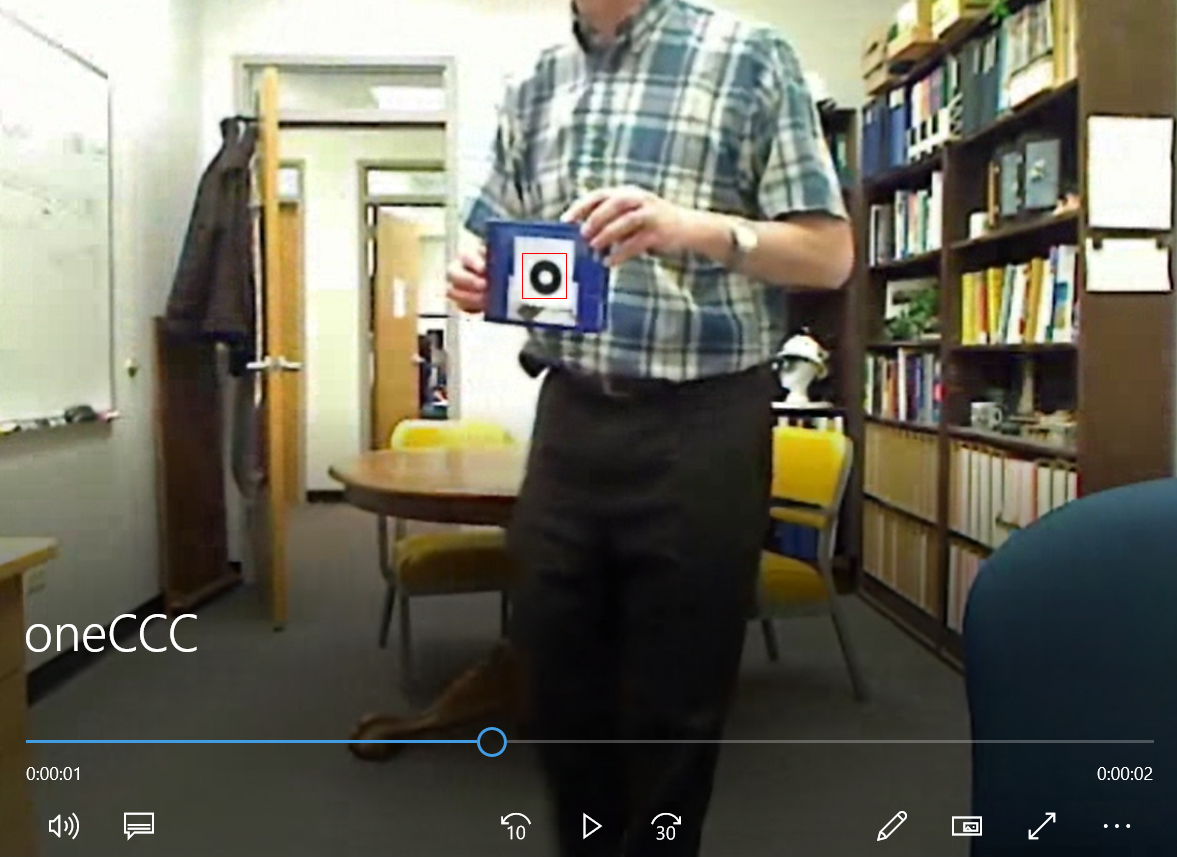

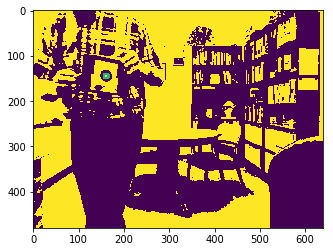

bover


In [3]:
# 读取视频并显示一帧图片
import cv2
import numpy as np
videoCap = cv2.VideoCapture('./oneCCC.wmv')
if videoCap.isOpened()==False:
    print('视频无法打开或者视频地址错误')

while videoCap.isOpened():
    ret, frame = videoCap.read()
    if ret == False:
        print('bover')
        break
    import numpy as np
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    frame = cv2.threshold(frame,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]# 因为连通域算法只适用于二值化了图片所以要进行二值化操作
    
    ret, labels = cv2.connectedComponents(frame)
    center1 = np.zeros((ret+1,2))
    center1 = center1.astype(np.int32)

    
    for i in range(0, ret):
        row,col = np.where(labels==i)
        center1[i] = np.mean(row),np.mean(col)

    frame = cv2.bitwise_not(frame)
    ret, labels = cv2.connectedComponents(frame)
    
    center2 = np.zeros((ret+1,2))
    for i in range(0, ret):
        row,col = np.where(labels==i)
        center2[i] = np.mean(row),np.mean(col)
    
    center2 = center2.astype(np.int32)

    index = 0
    value = np.inf
    
    # 找白块和黑块中的中心点最近的那个点
    for i in range(ret):
        mvalue = np.sum(np.abs(center1-center2[i]),axis=1).min()
        if mvalue<value:
            index = i
            value = mvalue

    # 绘制出目标框
    y,x = np.where(labels==index)
    cv2.rectangle(frame,(x.min(),y.min()),(x.max(),y.max()),165,3)
    
    import matplotlib.pyplot as plt
    plt.imshow(frame)
    plt.show()
    cv2.imshow('track circle',frame)
    cv2.waitKey(0)
    if cv2.waitKey(25) & 0xFF == ord('q'):#按下q键就退出
        break


videoCap.release()
cv2.destroyAllWindows()
            
        